In [85]:
import pandas as pd 
import numpy as np 


In [86]:
df=pd.read_csv(r'C:\Users\SDS\Downloads\house_socity_price.csv',usecols=['SalePrice','GarageQual','FireplaceQu'])

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   FireplaceQu  770 non-null    object
 1   GarageQual   1379 non-null   object
 2   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 34.3+ KB


In [88]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

In [89]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [90]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


# frequent_missing_value imputation


<Axes: xlabel='FireplaceQu'>

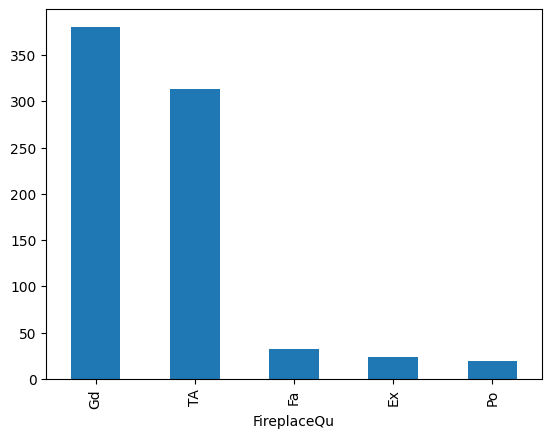

In [91]:
df['FireplaceQu'].value_counts().plot(kind='bar')

<Axes: xlabel='GarageQual'>

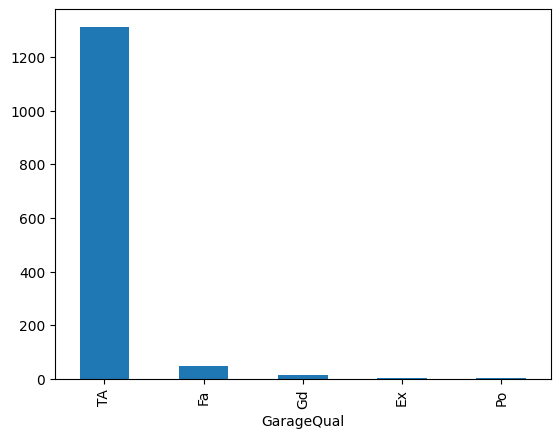

In [92]:
df['GarageQual'].value_counts().plot(kind='bar')

In [93]:
mode1=df['FireplaceQu'].mode()
mode2=df['GarageQual'].mode()


In [94]:
df['FireplaceQu_mode']=df['FireplaceQu'].fillna(mode1)
df['GarageQual_mode']=df['GarageQual'].fillna(mode2)
df

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_mode,GarageQual_mode
0,NaN,TA,208500,Gd,TA
1,TA,TA,181500,TA,TA
2,TA,TA,223500,TA,TA
3,Gd,TA,140000,Gd,TA
4,TA,TA,250000,TA,TA
...,...,...,...,...,...
1455,TA,TA,175000,TA,TA
1456,TA,TA,210000,TA,TA
1457,Gd,TA,266500,Gd,TA
1458,NaN,TA,142125,NaN,TA


In [95]:
import matplotlib.pyplot as plt 
import seaborn as sns 

<Axes: xlabel='SalePrice', ylabel='Density'>

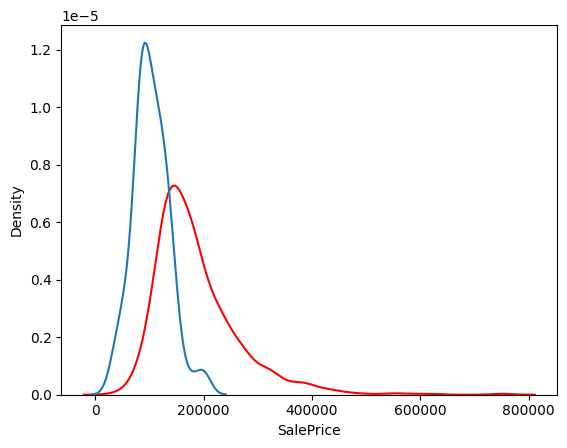

In [96]:
sns.kdeplot(df[df['GarageQual']=='TA']['SalePrice'],color='red')
sns.kdeplot(df[df['GarageQual'].isnull()]['SalePrice'])

Text(0.5, 1.0, 'GarageQual')

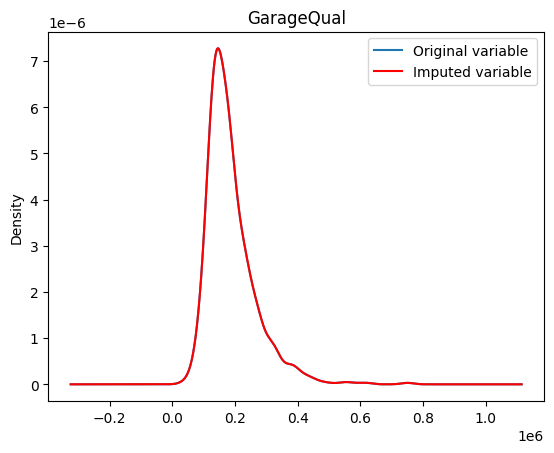

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)


df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual_mode'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

Text(0.5, 1.0, 'FireplaceQu')

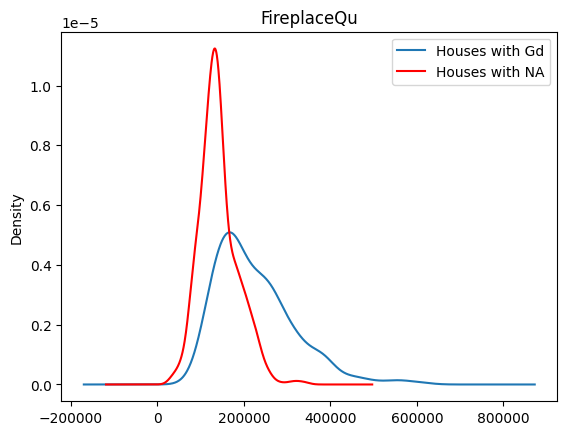

In [100]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')
# add title
plt.title('FireplaceQu')

In [ ]:
df=df.drop(columns=['GarageQual_mode','FireplaceQu_mode'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [ ]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
sm=SimpleImputer(strategy='most_frequent')

In [ ]:
sm.fit_transform(x_train)

array([['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ...,
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA']], dtype=object)

In [ ]:
sm.transform(x_test)

array([['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Ex', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['TA', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Fa', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'Fa'],
       ['Gd', 'TA'],
       ['Gd',

In [ ]:
sm.statistics_

array(['Gd', 'TA'], dtype=object)